In [1]:
from statsmodels.datasets import grunfeld
data = grunfeld.load_pandas().data
data = data.set_index(["year", "firm"])
data = data.sort_index()

data

invest     value  capital
year   firm                                         
1935.0 American Steel       2.938    30.284   52.011
       Atlantic Refining   39.680   157.700  183.200
       Chrysler            40.290   417.500   10.500
       Diamond Match        2.540    70.910    4.500
       General Electric    33.100  1170.600   97.800
...                           ...       ...      ...
1954.0 Goodyear            49.340   474.500  468.000
       IBM                135.720   927.300  238.700
       US Steel           459.300  2115.500  669.700
       Union Oil           89.510   192.700  511.300
       Westinghouse        68.600  1188.900  213.500

[220 rows x 3 columns]

In [2]:
import fastipca as ipca

Z = data.loc[:, "value":]
R = data["invest"]

gamma, factors = ipca.train(Z, R)

In [3]:
gamma

,0
value,0.99166
capital,0.12888


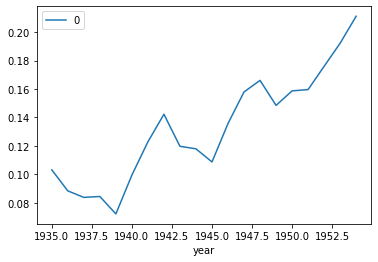

In [4]:
factors.plot()

In [5]:
yhat = ipca.predict(Z, gamma, factors)
yhat

year    firm             
1935.0  American Steel         3.790898
        Atlantic Refining     18.574988
        Chrysler              42.865010
        Diamond Match          7.316510
        General Electric     121.095490
                                ...    
1954.0  Goodyear             112.067788
        IBM                  200.620967
        US Steel             461.092307
        Union Oil             54.252174
        Westinghouse         254.700248
Length: 220, dtype: float64

In [6]:
from sklearn.metrics import r2_score
r2_score(R, yhat)

0.8599454947976319